In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def format_mean_std(mean, std, is_max=False):
    value = f"{mean:.3f} ({std:.3f})"
    return f"\\textbf{{{mean:.3f}}} ({std:.3f})" if is_max else value


def relabel(row):
    labels = []
    if row['heterogenous_msg_passing']:
        labels.append("Hetero Msg Pa'ssing")
    if row['semi_transductive']:
        labels.append("Semi-transductive")
    if row['relative_time']:
        labels.append("Relative Time")
    if not len(labels): labels = ["GNN Baseline"]
    row['combined_dimensions'] = ' + '.join(labels)
    return row

def process_csv_to_latex(csv_file):
    df = pd.read_csv(csv_file)

    # Grouping the dataframe and calculating mean and std
    grouped_df = df.groupby(['dataset_path', 'heterogenous_msg_passing', 'semi_transductive', 'relative_time']).agg(
        test_AUC_mean=('test_AUC', 'mean'),
        test_AUC_std=('test_AUC', 'std'),
        test_AP_mean=('test_AP', 'mean'),
        test_AP_std=('test_AP', 'std')
    ).reset_index()

    # Relabeling and counting True values
    grouped_df = grouped_df.apply(relabel, axis=1)

    # Formatting the output for LaTeX tables
    for path, group in grouped_df.groupby('dataset_path'):
        max_auc = group['test_AUC_mean'].max()
        max_ap = group['test_AP_mean'].max()
        print(f"\nLaTeX Table for dataset path: {path}\n")
        print("\\begin{tabular}{lll}\\toprule")
        print("Components & Test AUC (std) & Test AP (std) \\\\ \\midrule")
        for _, row in group.iterrows():
            print(f"{row['combined_dimensions']} & "
                  f"{format_mean_std(row['test_AUC_mean'], row['test_AUC_std'], row['test_AUC_mean'] == max_auc)} & "
                  f"{format_mean_std(row['test_AP_mean'], row['test_AP_std'], row['test_AUC_mean'] == max_auc)} \\\\")
        print("\\bottomrule\\end{tabular}\n")

# Replace 'yourfile.csv' with the path to your CSV file
process_csv_to_latex('results/results.csv')



LaTeX Table for dataset path: data/act-mooc/graph.pt

\begin{tabular}{lll}\toprule
Components & Test AUC (std) & Test AP (std) \\ \midrule
GNN Baseline & 0.491 (0.009) & 0.009 (0.000) \\
Relative Time & 0.508 (0.010) & 0.010 (0.000) \\
Semi-transductive & 0.517 (0.012) & 0.010 (0.001) \\
Semi-transductive + Relative Time & 0.506 (0.009) & 0.010 (0.000) \\
Hetero Msg Pa'ssing & 0.720 (0.003) & 0.024 (0.001) \\
Hetero Msg Pa'ssing + Relative Time & 0.720 (0.003) & 0.023 (0.001) \\
Hetero Msg Pa'ssing + Semi-transductive & 0.719 (0.002) & 0.024 (0.000) \\
Hetero Msg Pa'ssing + Semi-transductive + Relative Time & \textbf{0.722} (0.007) & \textbf{0.027} (0.004) \\
\bottomrule\end{tabular}


LaTeX Table for dataset path: data/junyi/graph_sub.pt

\begin{tabular}{lll}\toprule
Components & Test AUC (std) & Test AP (std) \\ \midrule
GNN Baseline & 0.497 (0.010) & 0.040 (0.000) \\
Relative Time & 0.490 (0.016) & 0.039 (0.001) \\
Semi-transductive & 0.514 (0.005) & 0.042 (0.001) \\
Semi-transduct

In [8]:
df = pd.read_csv('results/results_tgn.csv')

In [9]:
grouped_df = df.groupby(['dataset_path']).agg(
        test_AUC_mean=('test_AUC', 'mean'),
        test_AUC_std=('test_AUC', 'std'),
        test_AP_mean=('test_AP', 'mean'),
        test_AP_std=('test_AP', 'std')
    ).reset_index()

In [10]:
for path, group in grouped_df.groupby('dataset_path'):
    max_auc = group['test_AUC_mean'].max()
    max_ap = group['test_AP_mean'].max()
    print(f"\nLaTeX Table for dataset path: {path}\n")
    print("\\begin{tabular}{lll}\\toprule")
    print("Components & Test AUC (std) & Test AP (std) \\\\ \\midrule")
    for _, row in group.iterrows():
        print(f"TGN Baseline & "
              f"{format_mean_std(row['test_AUC_mean'], row['test_AUC_std'], False)} & "
              f"{format_mean_std(row['test_AP_mean'], row['test_AP_std'], False)} \\\\")
    print("\\bottomrule\\end{tabular}\n")


LaTeX Table for dataset path: data/act-mooc/graph.pt

\begin{tabular}{lll}\toprule
Components & Test AUC (std) & Test AP (std) \\ \midrule
TGN Baseline & 0.711 (0.022) & 0.032 (0.005) \\
\bottomrule\end{tabular}


LaTeX Table for dataset path: data/junyi/graph_sub.pt

\begin{tabular}{lll}\toprule
Components & Test AUC (std) & Test AP (std) \\ \midrule
TGN Baseline & 0.558 (0.001) & 0.056 (0.002) \\
\bottomrule\end{tabular}



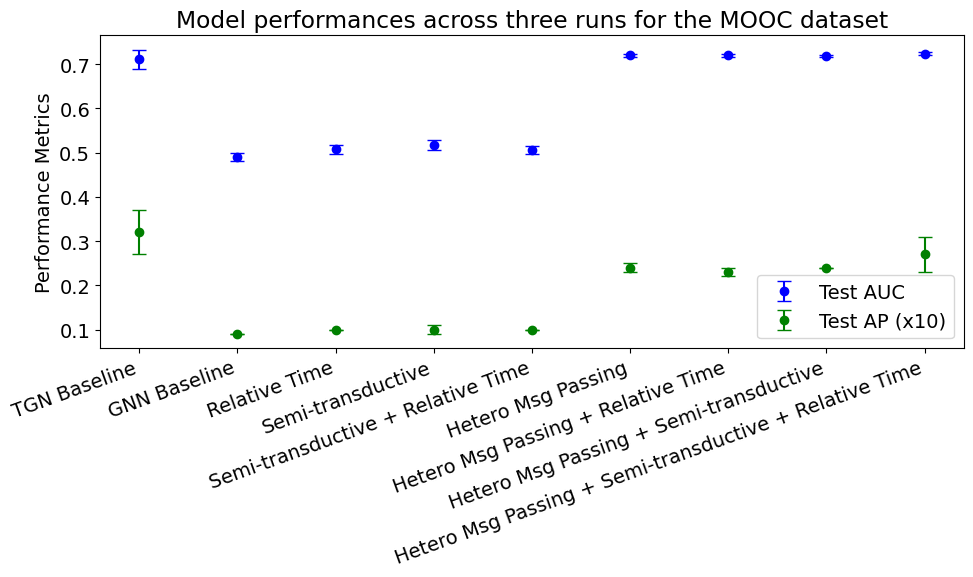

In [34]:
import matplotlib as mpl

# Increasing the font size for all text elements in the plot
mpl.rcParams.update({'font.size': 14})

components = [
    "TGN Baseline", "GNN Baseline", "Relative Time", 
    "Semi-transductive", "Semi-transductive + Relative Time", 
    "Hetero Msg Passing", "Hetero Msg Passing + Relative Time", 
    "Hetero Msg Passing + Semi-transductive", 
    "Hetero Msg Passing + Semi-transductive + Relative Time"
]
test_auc_means = [0.711, 0.491, 0.508, 0.517, 0.506, 0.720, 0.720, 0.719, 0.724]
test_auc_stds = [0.022, 0.009, 0.010, 0.012, 0.009, 0.003, 0.003, 0.002, 0.004]
test_ap_means = [0.032, 0.009, 0.010, 0.010, 0.010, 0.024, 0.023, 0.024, 0.027]
test_ap_stds = [0.005, 0.000, 0.000, 0.001, 0.000, 0.001, 0.001, 0.000, 0.004]
# Multiplying the Test AP means and stds by 10
test_ap_means_adjusted = [x * 10 for x in test_ap_means]
test_ap_stds_adjusted = [x * 10 for x in test_ap_stds]

# Re-plotting the data with adjusted Test AP
y_pos = np.arange(len(components))
fig, ax = plt.subplots(figsize=(10, 6))

# Test AUC plot
ax.errorbar(y_pos, test_auc_means, yerr=test_auc_stds, fmt='o', label='Test AUC', color='blue', capsize=5, linestyle='')

# Adjusted Test AP plot
ax.errorbar(y_pos, test_ap_means_adjusted, yerr=test_ap_stds_adjusted, fmt='o', label='Test AP (x10)', color='green', capsize=5, linestyle='')

# Labels and Title
ax.set_xticks(y_pos)
ax.set_xticklabels(components, rotation=20, ha='right')
ax.set_ylabel('Performance Metrics')
ax.set_title('Model performances across three runs for the MOOC dataset')
ax.legend()

# Show plot
plt.tight_layout()
plt.savefig("figures/mooc_results.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()

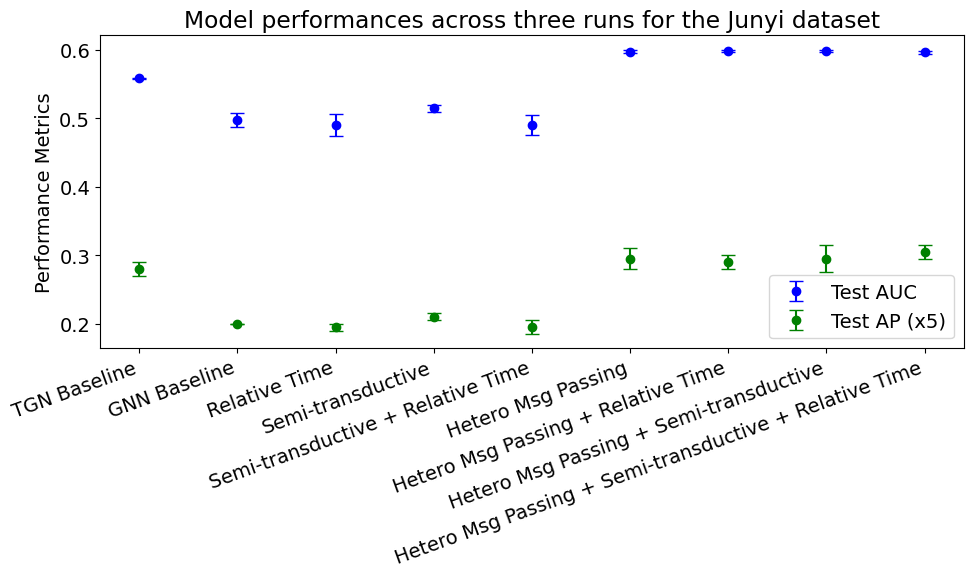

In [35]:
# New data from the Junyi dataset table
test_auc_means_junyi = [0.558, 0.497, 0.490, 0.514, 0.490, 0.597, 0.598, 0.598, 0.596]
test_auc_stds_junyi = [0.001, 0.010, 0.016, 0.005, 0.015, 0.002, 0.002, 0.001, 0.002]
test_ap_means_junyi = [x * 5 for x in [0.056, 0.040, 0.039, 0.042, 0.039, 0.059, 0.058, 0.059, 0.061]]  # Multiplying by 10
test_ap_stds_junyi = [x * 5 for x in [0.002, 0.000, 0.001, 0.001, 0.002, 0.003, 0.002, 0.004, 0.002]]  # Multiplying by 10

# Re-plotting the data for the Junyi dataset
fig, ax = plt.subplots(figsize=(10, 6))

# Test AUC plot for Junyi
ax.errorbar(y_pos, test_auc_means_junyi, yerr=test_auc_stds_junyi, fmt='o', label='Test AUC', color='blue', capsize=5, linestyle='')

# Adjusted Test AP plot for Junyi
ax.errorbar(y_pos, test_ap_means_junyi, yerr=test_ap_stds_junyi, fmt='o', label='Test AP (x5)', color='green', capsize=5, linestyle='')

# Labels and Title
ax.set_xticks(y_pos)
ax.set_xticklabels(components, rotation=20, ha='right')
ax.set_ylabel('Performance Metrics')
ax.set_title('Model performances across three runs for the Junyi dataset')
ax.legend()



# Show plot
plt.tight_layout()
plt.savefig("figures/junyi_results.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()